# xlwings

## Quickstart



In [20]:
# Scripting: Automate/interact with Excel from Python
# Establish a connection to a workbook

import xlwings as xw

# this will open a new workbook
wb = xw.Book() 

In [38]:
# connect to a file that is open or in the current working directory
wb = xw.Book('test.xlsx')

In [23]:
# on Windows: use raw strings to escape backslashes
wb = xw.Book(r'H:\Projects\Jupyter Notebooks\Exercise Files\Final Files\module_01\01_03_demo\returns.xlsx')
# r为raw的首字母，后无空格

In [25]:
# If you have the same file open in two instances of Excel, you need to 
# fully qualify it and include the app instance. You will find your app 
# instance key (the PID) via xw.app.keys()
xw.apps[10559].books['test.xlsx']

KeyError: 'Could not find an Excel instance with this PID.'

In [28]:
# Instantiate a sheet object

sheet = wb.sheets['Sheet1']

In [29]:
# Reading/writing values to/from ranges is as easy as

sheet['A1'].value = 'Foo 1'

In [30]:
sheet['A1'].value

'Foo 1'

In [31]:
# There are many convenience features available, e.g. Range expanding

sheet['A1'].value = [['Foo 1', 'Foo 2', 'Foo 3'],
                     [10.0, 20.0, 30.0]]

In [32]:
sheet['A1'].expand().value

[['Foo 1', 'Foo 2', 'Foo 3'], [10.0, 20.0, 30.0]]

In [36]:
# Powerful converters handle most data types of interest, including
# NumPy arrays and Pandas DataFrames in both directions

import pandas as pd
df = pd.DataFrame([1, 2], [3, 4], columns=['a', 'b'])
sheet['A1'].value = df

ValueError: Shape of passed values is (2, 1), indices imply (2, 2)

In [39]:
sheet['A1'].options(pd.DataFrame, expand='table').value

,Foo 2,Foo 3
Foo 1,,
10.0,20.0,30.0


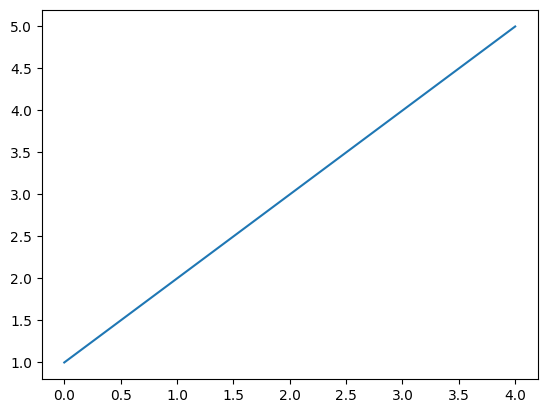

In [49]:
# Matplotlib figures can be shown as pictures in Excel

import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot([1, 2, 3, 4, 5])

In [50]:
import xlwings as xw
wb = xw.Book('test.xlsx')
sheet = wb.sheets['Sheet1']
sheet.pictures.add(fig, name='MyPlot', update=True)

TypeError: Don't know what to do with that image object

In [5]:
# The view function
# The view function accepts pretty much any object of interest, whether 
# that's a number, a string, a nested list or a NumPy array or a pandas 
# DataFrame. By default, it writes the data into an Excel table in a new 
# workbook. If you wanted to reuse the same workbook, provide a sheet 
# object, e.g. view(df, sheet=xw.sheets.active), for further options see
# view.

import pandas as pd
from xlwings import view

In [6]:
df = pd.DataFrame(data={'one': [0, 1, 2, 3, 4],
                        'two': [5, 6, 7, 8, 9]})
df

,one,two
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [7]:
# Changed in version 0.22.0: Earlier versions were not formatting the output 
# as Excel table
view(df)

In [18]:
# The load function
# To load in a range in an Excel sheet as pandas DataFrame, use the load 
# function. If you only select one cell, it will auto-expand to cover the 
# range. If, however, you select a specific range that is bigger than one 
# cell, it will load in only the selected cells. If the data in Excel does 
# not have an index or header, set them to False like this: 
# xw.load(index=False), see also load.
# New in version 0.22.0.

from xlwings import load

In [19]:
load("H:\\Projects\\Jupyter Notebooks\\Exercise Files\\Final Files\\module_01\\01_03_demo\\returns.xlsx")

XlwingsError: Couldn't find any active App!